# Regularisasi berbasis Shrinkage

### Regularisasi: Ridge Regression

Ridge Regression memiliki konsep yang mirip dengan Ordinary Least Square (OLS), hanya saja Ridge Regression menambahkan suatu properti agar nilai yang diminimasi tidak hanya RSS. Ridge Regression akan mempertimbangkan apakah nilai dari suatu bobot parameter terlampau besar atau tidak. Jika nilai dari suatu bobot parameter terlampau besar, hal tersebut akan mempengaruhi nilai yang diminimasi. Mari kita lihat formula yang diminimasi berikut:

\begin{equation}
\sum_{i=1}^{n}(y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} )^2 + \lambda \sum_{j=1}^{p} \beta_j^2 = RSS + \lambda \sum_{j=1}^{p} \beta_j^2
\end{equation}

RSS (Residual Sum Square) adalah nilai yang diminimasi oleh OLS. Ridge Regression menambahkan $\lambda \sum_{j=1}^{p} \beta_j^2$ sebagai shrinkage penalty yang dikontrol oleh _tuning parameter_ $\lambda$ (Nilai $\lambda \geq 0$). Nilai shrinkage penalty ($\lambda \sum_{j=1}^{p} \beta_j^2$) tersebut akan semakin kecil jika nilai $\beta_1, \beta_2, ..., \beta_p $ mendekati 0, maka dari itu nilai penalty ini akan memiliki efek "menyusutkan" perkiraan $\beta_j$ menuju 0 (tetapi tidak = 0).

Jika nilai $\lambda = 0$, nilai shrinkage penalty tersebut tidak akan berefek apa-apa, dan menjadikan nilai yang diminimasi adalah MSE biasa. Namun, jika $\lambda \rightarrow \infty$, dampak dari shrinkage penalty akan meningkat dan membuat bobot parameter akan mendekati 0. Tidak seperti OLS, ridge regression akan menghasilkan himpunan bobot parameter yang berbeda untuk tiap nilai $\lambda$ yang berbeda.

Shrinkage penalty hanya diterapkan terhadap $\beta_1, \beta_2, ..., \beta_p $ dan bukan terhadap $\beta_0$ karena kita tidak ingin "menyusutkan" intercept, yang bermakna rata-rata dari target ketika semua prediktor bernilai 0. Untuk mendapatkan gambaran yang lebih jelas dari Ridge Regression, bisa dilihat gambar di bawah ini.

![Alt Text](img/3. rr-coefficient.jpeg)

Dari gambar di atas, bisa kita lihat penerapan Ridge Regression terhadap suatu dataset "student". Tiap garis menandakan variabel prediktor, dari berbagai macam variabel prediktor yang dimiliki, terlihat hanya 4 yang signifikan (Income, Limit, Rating, Student). Standardized Coefficient menandakan bahwa nilai dari masing-masing variabel prediktor sudah dinormalisasi agar memiliki rerata 0 (misal dari 0-100 sudah dinormalisasi agar nilainya -50 hingga 50, asumsi distribusi seragam).

Semakin kecil nilai $\lambda$, semakin terlihat bahwa bobot dari masing-masing parameter semakin besar. Dan sebaliknya, semakin besar nilai $\lambda$, nilai bobot parameter akan semakin kecil dan mendekati 0.

![Alt Text](img/3. rr-mse.jpeg)

Sedangkan gambar di atas menunjukkan dampak dari $\lambda$ terhadap MSE dari dataset simulasi. Garis ungu menandakan test MSE, garis hijau menandakan simpangan (variance), dan garis hitam menandakan bias kuadrat (squared bias). Terlihat bahwa dengan bias yang semakin besar/_underfitting_ (sisi kanan) diperoleh dari dampak $\lambda$ yang semakin besar. Berarti model yang dibangun tidak mengikuti dengan baik dari data yang ada jika bobot parameter semakin kecil ($\lambda \rightarrow \infty$). Sedangkan variance yang semakin besar/_overfitting_ (sisi kiri) dipengaruhi oleh semakin kecil ($\lambda \rightarrow 0$).

### Regularisasi: LASSO Regression

Tidak seperti Ridge Regression, LASSO memiliki fungsi penalti yang lebih "tegas". Jika Ridge Regression mengurangi efek dari masing-masing bobot dari prediktor, LASSO akan mengeliminasi prediktor dengan membuat nol bobot prediktor tersebut. Fungsi minimasi yang akan dimodifikasi dari dasar RSS dari LASSO Regression adalah

\begin{equation}
\sum_{i=1}^{n}(y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} )^2 + \lambda \sum_{j=1}^{p} |\beta_j| = RSS + \lambda \sum_{j=1}^{p} |\beta_j|
\end{equation}

Shrinkage penalty LASSO menggunakan formula $\lambda \sum_{j=1}^{p} |\beta_j|$. Formula tersebut akan "memaksa" beberapa variabel di suatu nilai $\lambda$ tertentu menjadi 0. Sama seperti Ridge Regression, semakin besar nilai $\lambda$  akan mengakibatkan nilai dari bobot parameter mendekati 0, sedangkan semakin kecil nilai $\lambda$ akan membuat bobot parameter mendekati nilai aslinya tanpa regularisasi. Secara lebih jelas, dampak dari nilai $\lambda$ terhadap bobot parameter dapat dilihat di gambar di bawah ini.

![Alt Text](img/3. lasso-coef.jpeg)

Dari gambar di atas, dapat dilihat, pada $\lambda = 500$ variabel selain 4 prediktor (Income, Limit, Rating, Student) dari dataset student akan dipaksa menjadi 0. Nilai $\lambda$ yang lebih kecil akan mengakibatkan beberapa variabel lain tergabung dalam model sedangkan nilai $\lambda$ yang lebih besar mengakibatkan variabel-variabel menjadi "hilang" dari model (berkoefisien 0).

![Alt Text](img/3. lasso-mse.jpeg)

Dampak dari penerapan LASSO terhadap suatu dataset hasil simulasi dapat dilihat di gambar di atas. Sama dengan Ridge Regression, garis ungu menandakan test MSE, garis hijau menandakan simpangan (variance), dan garis hitam menandakan bias kuadrat (squared bias). Terlihat bahwa dengan bias yang semakin besar/_underfitting_ (sisi kanan) diperoleh dari dampak $\lambda$ yang semakin besar. Berarti model yang dibangun tidak mengikuti dengan baik dari data yang ada jika bobot parameter semakin kecil ($\lambda \rightarrow \infty$). Sedangkan variance yang semakin besar/_overfitting_ (sisi kiri) dipengaruhi oleh semakin kecil ($\lambda \rightarrow 0$).

### Regularisasi Ridge Regression dan LASSO dari sisi lain

Dengan cara konsep lain, Ridge Regression dan LASSO dapat dituliskan seperti di bawah ini

LASSO: \begin{equation}
minimize_\beta \Big \{ \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij})^2 \Big  \} \text{mengacu pada } \sum_{j=1}^{p}|\beta_j|\leq s
\end{equation}

dan 

Ridge Regression:
\begin{equation}
minimize_\beta \Big \{ \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij})^2 \Big  \} \text{mengacu pada } \sum_{j=1}^{p}\beta_j^2\leq s
\end{equation}

Becermin pada formula sebelumnya dengan $\lambda$, $s$ berfungsi sebagai suatu nilai yang mengatur seberapa besar nilai bobot dari parameter variabel prediktor. Dengan kata lain, untuk setiap nilai $\lambda$ ada suatu nilai $s$ yang memberikan nilai bobot dari parameter yang sama besar. 

Secara umum, penerapan $s$ dalam LASSO dan Ridge Regression dengan dua variabel prediktor dapat dilihat pada gambar di bawah ini.

![Alt Text](img/3. s-rss.jpeg)

Dengan ilustrasi LASSO di sebelah kiri dan Ridge Regression di sebelah kanan. Daerah biru adalah daerah batasan yang diakibatkan oleh $|\beta_1 + \beta_2 \leq s|$ dan  $\beta_1^2 + \beta_2^2 \leq s$, dan elips merah adalah garis kontur dari RSS data tersebut. Titik hitam $\hat{\beta}$ adalah pasangan nilai $\beta_1$ dan $\beta_2$ yang membuat RSS minimum tanpa regularisasi. 

Jika nilai $s$ yang ditentukan cukup besar dan mencapai titik hitam $\hat{\beta}$, berarti nilai $s$ tersebut mengakibatkan perkiraan LASSO dan Ridge Regression menjadi sama dengan OLS.

### Contoh: Penerapan Ridge Regression dan LASSO

Regularisasi Ridge Regression dan LASSO sudah termasuk dalam pustaka sklearn. Yang perlu diatur dari implementasinya adalah nilai $\lambda$ atau alpha dalam notasi di sklearn.

#### Contoh penerapan Ridge Regression pada dataset acak
(sumber: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

Dalam contoh ini, regularisasi dengan konsep shrinking akan diterapkan dengan sklearn dan dataset yang dibangkitkan dengan $Y = 10 + \beta X + \epsilon$ dengan fitur sejumlah 15

In [56]:
#Pembuatan dataset regresi acak dengan fungsi awal Y = 10 + (suatu vektor parameter) * X

import numpy as np
n_train, n_test, n_features = 4500, 500, 15
np.random.seed(0)

a = np.random.randn(n_features)
X_train = np.random.randn(n_train,n_features)
X_test = np.random.randn(n_test,n_features)

Y_train =  np.sum(10 + a*X_train,axis=1)+np.random.randn(n_train)
Y_test = np.sum(10 + a*X_test,axis=1) + np.random.randn(n_test)

Code di bawah ini akan menerapkan regularisasi dengan konsep Ridge Regression terhadap dataset acak tersebut dan mencatat nilai MSE Uji dan bobot parameter yang terkait dengan masing-masing nilai $\lambda$. Nilai $\lambda$ yang akan diobservasi adalah $10^{-10}$ hingga $10^{10}$ dengan interval masing-masing adalah tiap perkalian 10.

In [88]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alpha_set = np.array([])
mse_set_rr = np.array([])
#menggunakan dummy array untuk memudahkan stacking parameter set,
#nilai dummy ini akan dihapus di akhir prosedur
parameter_set_rr = np.empty([1,15])

for i in range (-10,10):
    reg = Ridge(alpha=10**i)
    reg.fit(X_train,Y_train)
    Y_pred = reg.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    alpha_set = np.append(alpha_set,10**i)
    mse_set_rr = np.append(mse_set_rr,mse)
    parameter_set_rr = np.vstack((parameter_set_rr,reg.coef_))
#penghapusan nilai dummy
parameter_set_rr = parameter_set_rr[1:,:]

Lalu, kita akan melihat dampak dari regularisasi terhadap perubahan perkiraan bobot parameter dari persamaan tersebut dan dibandingkan dengan nilai $\lambda$. Kita akan mengeplot 5 bobot prediktor saja dari total 15 bobot parameter yang kita miliki.

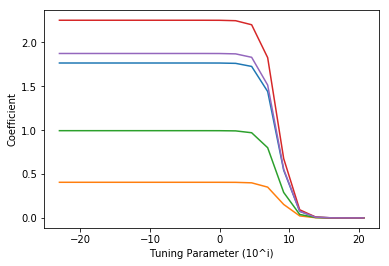

In [89]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.plot(np.log(alpha_set), parameter_set_rr[:,i],label = "line "+str(i))

plt.xlabel('Tuning Parameter (10^i)')
plt.ylabel('Coefficient')

plt.show()

Lalu, kita akan mengamati bagaimana perubahan MSE terhadap perubahan nilai $\lambda$

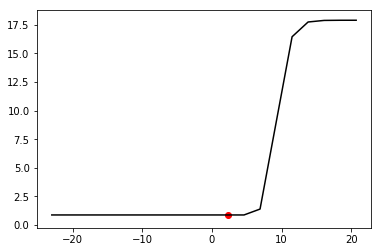

Minimum MSE terjadi ketika tuning parameter: 10^2 


In [96]:
plt.plot(np.log(alpha_set), mse_set_rr,  color='black')

#mencari nilai terkecil
min_index = np.argmin(mse_set_rr)
plt.scatter(np.log(alpha_set[min_index]), mse_set_rr[min_index],  color='red')

plt.show()

print("Minimum MSE terjadi ketika tuning parameter: 10^%d " % np.log(alpha_set[min_index]))

#### Contoh penerapan LASSO pada dataset acak
(sumber: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

Dengan dataset yang sama dan prosedur yang sama, kita akan menerapkan bagaimana performa regularisasi LASSO untuk linear regression.

Code untuk membuat model dan mencatat bobot parameter dan MSE uji yang bersesuaian dengan nilai $\lambda$ atau alpha dari LASSO bisa dilihat di bawah ini

In [85]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha_set = np.array([])
mse_set_lasso = np.array([])

#menggunakan dummy array untuk memudahkan stacking parameter set,
#nilai dummy ini akan dihapus di akhir prosedur
parameter_set_lasso = np.empty([1,15])

for i in range (-10,10):
    reg = Lasso(alpha=10**i)
    reg.fit(X_train,Y_train)
    Y_pred = reg.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    alpha_set = np.append(alpha_set,10**i)
    mse_set_lasso = np.append(mse_set_lasso,mse)
    parameter_set_lasso = np.vstack((parameter_set_lasso,reg.coef_))
#penghapusan nilai dummy
parameter_set_lasso = parameter_set_lasso[1:,:]

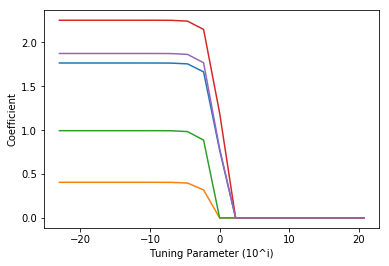

In [92]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.plot(np.log(alpha_set), parameter_set_lasso[:,i],label = "line "+str(i))

plt.xlabel('Tuning Parameter (10^i)')
plt.ylabel('Coefficient')

plt.show()

Lalu, kita akan mengamati bagaimana perubahan MSE terhadap perubahan nilai $\lambda$ pada LASSO

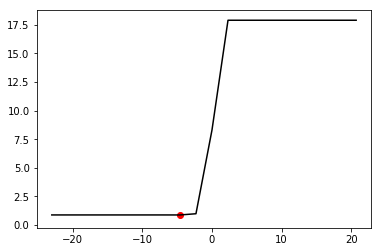

Minimum MSE terjadi ketika tuning parameter: 10^-4 


In [97]:
plt.plot(np.log(alpha_set), mse_set_lasso,  color='black')

#mencari nilai terkecil
min_index = np.argmin(mse_set_lasso)
plt.scatter(np.log(alpha_set[min_index]), mse_set_lasso[min_index],  color='red')

plt.show()

print("Minimum MSE terjadi ketika tuning parameter: 10^%d " % np.log(alpha_set[min_index]))

Mari kita bandingkan nilai minimum MSE uji Ridge Regression dan LASSO.

In [98]:
min_index_rr = np.argmin(mse_set_rr)
min_index_lasso = np.argmin(mse_set_lasso)

print("Ridge Regression")
print("Minimum MSE: %lf, alpha: 10^%d " % (mse_set_rr[min_index_rr],np.log(alpha_set[min_index_rr])) )

print("LASSO")
print("Minimum MSE: %lf, alpha: 10^%d " % (mse_set_lasso[min_index_lasso],np.log(alpha_set[min_index_lasso])) )

Ridge Regression
Minimum MSE: 0.887555, alpha: 10^2 
LASSO
Minimum MSE: 0.886179, alpha: 10^-4 


Kesimpulan: pada dataset acak yang dibuat, model yang diregularisasi oleh LASSO memiliki MSE uji yang lebih kecil. Sehingga dapat dikatakan untuk kasus ini, LASSO memberikan model yang lebih baik daripada Ridge Regression maupun model OLS biasa. 


### Latihan: Penerapan Ridge Regression dan LASSO

Dengan dataset Red Wine Quality, bandingkan performa regularisasi dari Ridge Regression dan LASSO dengan nilai $\lambda$ dari $10^{-10}$ hingga $10^{10}$.